In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.torch_adapter import TorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_dataset_cfg

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.MOTION_SENSE)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

In [3]:
dataset = TorchAdapter(cfg)
dataset.preprocess(force_recompute)
dataset.postprocess(split_group_index=0, force_recompute=force_recompute)

2025-10-13 01:03:14,628 - whar-datasets - INFO - Running DownloadingStep
2025-10-13 01:03:14,628 - whar-datasets - INFO - Checking hash for DownloadingStep
2025-10-13 01:03:14,629 - whar-datasets - INFO - Hash is not up to date
2025-10-13 01:03:14,630 - whar-datasets - INFO - Downloading motion_sense
2025-10-13 01:03:36,387 - whar-datasets - INFO - Extracting motion_sense
2025-10-13 01:03:37,588 - whar-datasets - INFO - Running ParsingStep
2025-10-13 01:03:37,588 - whar-datasets - INFO - Checking hash for ParsingStep
2025-10-13 01:03:37,589 - whar-datasets - INFO - Hash is not up to date
2025-10-13 01:03:37,589 - whar-datasets - INFO - Checking download
2025-10-13 01:03:37,590 - whar-datasets - INFO - Download exists
2025-10-13 01:03:37,590 - whar-datasets - INFO - Parsing to common format
Creating sessions: 100%|██████████| 360/360 [00:01<00:00, 241.95it/s]
2025-10-13 01:03:42,272 - whar-datasets - INFO - Saving common format
Caching sessions: 100%|██████████| 360/360 [00:01<00:00, 23

[########################################] | 100% Completed | 872.97 ms


2025-10-13 01:03:44,903 - whar-datasets - INFO - Common format validated.
2025-10-13 01:03:44,903 - whar-datasets - INFO - Compute windowing
2025-10-13 01:03:44,904 - whar-datasets - INFO - Selecting activities


[########################################] | 100% Completed | 2.28 sms


2025-10-13 01:03:47,376 - whar-datasets - INFO - Saving windowing
Caching windows: 100%|██████████| 21528/21528 [00:26<00:00, 809.42it/s]
2025-10-13 01:04:14,152 - whar-datasets - INFO - Loading windowing
2025-10-13 01:04:14,159 - whar-datasets - INFO - activity_ids from 0 to 5
2025-10-13 01:04:14,160 - whar-datasets - INFO - subject_ids from 0 to 23
2025-10-13 01:04:14,165 - whar-datasets - INFO - train: 16281 | val: 1810 | test: 3437
2025-10-13 01:04:14,166 - whar-datasets - INFO - Running SamplingStep
2025-10-13 01:04:14,167 - whar-datasets - INFO - Checking hash for SamplingStep
2025-10-13 01:04:14,168 - whar-datasets - INFO - Hash is not up to date
Loading windows: 100%|██████████| 21528/21528 [00:24<00:00, 886.84it/s]
2025-10-13 01:04:38,444 - whar-datasets - INFO - Computing samples
2025-10-13 01:04:38,445 - whar-datasets - INFO - Getting normalization parameters
2025-10-13 01:04:38,921 - whar-datasets - INFO - Normalizing and transforming windows
Normalizing and transforming wi

In [4]:
loaders = dataset.get_dataloaders(batch_size=32)

train_loader = loaders["train"]
test_loader = loaders["test"]
val_loader = loaders["val"]

In [5]:
weights = dataset.get_class_weights(test_loader)
print(weights)

{2: 0.5195984955083778, 4: 0.5739750822476266, 3: 0.6546665394336325, 1: 1.2279068923705445, 0: 1.451819325685173, 5: 1.572033664754646}


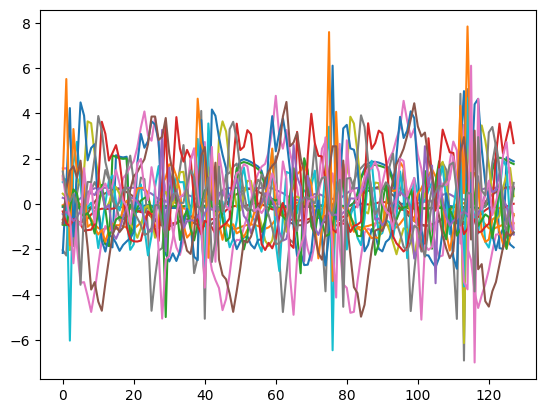

In [40]:
y_batch, x_batch = next(iter(train_loader))
x = x_batch[0].numpy()
plt.plot(x)
plt.show()